In [ ]:
# !pip install gensim 
# !<conda/mamba> install gensim

In [ ]:
# https://jalammar.github.io/illustrated-word2vec/

In [2]:
from pathlib import Path
from collections import Counter

from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import KeyedVectors

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

In [3]:
indir = Path("data/section_two/s3")
manifest = pd.read_csv(indir / "manifest.csv", index_col = 0)
manifest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 378
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       379 non-null    object
 1   year       379 non-null    int64 
 2   file_name  379 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [5]:
corpus = []
for fname in manifest["file_name"]:
    path = indir.joinpath(f"obits/{fname}")
    with path.open("r") as fin:
        doc = fin.read()
        corpus.append(doc.split())

In [6]:
corpus[0][:10]

['gifted',
 'mathematician',
 'recognize',
 'computer',
 'programmer',
 'claire',
 'cain',
 'miller',
 'century',
 'dawn']

In [7]:
model_path = indir.joinpath("glove/glove-wiki-gigaword_200d.bin")
model = KeyedVectors.load(model_path.as_posix())

In [8]:
len(model)

400000

In [12]:
assert model[0].all() == model["the"].all(), "Not the same!"

In [9]:
model.key_to_index

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [10]:
model["obituary"]

array([-0.17108  ,  0.40273  ,  0.43942  , -0.44063  , -0.14714  ,
       -0.3673   ,  0.10033  , -0.37445  ,  0.57423  , -0.043988 ,
        0.3451   ,  0.65127  ,  0.28834  ,  0.067671 ,  0.3755   ,
       -0.48     ,  0.1285   ,  0.36133  , -0.7723   , -0.30732  ,
       -0.1349   ,  0.14149  , -0.19713  ,  0.53129  , -0.010258 ,
        0.37119  ,  0.12272  , -0.44223  , -0.022096 ,  0.8303   ,
       -0.47224  ,  0.8494   ,  0.5106   ,  0.4128   ,  0.1427   ,
       -0.062894 , -0.04548  , -0.20324  ,  0.10987  , -0.43861  ,
       -0.37839  ,  0.52422  , -0.30245  , -0.10216  ,  0.39991  ,
        0.090911 ,  0.43594  ,  0.25796  , -0.15975  , -0.21836  ,
       -0.16669  , -0.92455  , -0.023449 ,  0.11237  , -0.072324 ,
       -0.38508  ,  0.21757  , -0.0436   ,  0.02948  , -0.41663  ,
       -0.35717  , -0.0439   , -0.28475  , -0.64372  , -0.73246  ,
       -0.28038  ,  0.24662  ,  0.028763 ,  0.6995   ,  0.693    ,
       -0.27429  , -0.66162  ,  0.49636  , -0.1127   , -0.1463

In [13]:
model["unshaped"]

KeyError: "Key 'unshaped' not present"

In [14]:
model["lol"]

array([ 0.35453  , -0.19605  , -0.19715  ,  0.80505  ,  0.067192 ,
       -0.11266  , -0.059133 ,  0.12008  , -0.86112  ,  0.8447   ,
        0.030202 ,  0.24324  ,  0.21915  , -0.1475   , -0.31665  ,
        0.061181 , -0.075119 ,  0.023373 ,  0.34295  , -0.1363   ,
        0.077157 , -0.70461  ,  0.60973  ,  0.031324 ,  0.042454 ,
       -0.45772  , -0.1989   ,  0.094255 , -0.41091  , -0.05212  ,
       -0.58294  , -0.27475  ,  0.23791  , -0.20324  , -0.38784  ,
       -0.67664  ,  0.61785  , -0.14846  ,  0.012805 ,  0.55891  ,
       -0.11748  ,  0.44129  ,  0.13845  , -0.63586  , -0.063358 ,
        0.63501  , -0.33797  ,  0.38167  ,  0.084017 , -0.030305 ,
       -0.20956  ,  0.47824  ,  0.015653 ,  0.13656  ,  0.3295   ,
        0.20032  , -0.18758  ,  0.33236  , -0.5555   , -0.40797  ,
        0.13662  , -0.047599 ,  0.53305  ,  0.29055  ,  0.34733  ,
       -0.10513  ,  0.0023103,  0.35067  ,  0.054271 , -0.029405 ,
       -0.041339 ,  0.18889  , -0.3345   , -0.27603  , -0.3354

In [16]:
a = "calculate"
b = "lol"
model.similarity(a, b)

-0.072315104

In [22]:
def show_most_similar(*args, func = model.most_similar, **kwargs):
    """Print cosine similarities."""
    similarities = func(*args, **kwargs)
    print(tabulate(similarities, ['Word', 'Score']))

In [31]:
show_most_similar("calculate", topn=15)

Word             Score
------------  --------
calculating   0.755602
calculated    0.702394
calculation   0.701992
compute       0.699091
calculations  0.676593
quantify      0.65038
calculates    0.649641
estimating    0.629788
measurements  0.613423
approximate   0.586202
accurately    0.585673
computed      0.578991
determining   0.578254
measurement   0.574398
parameters    0.564949


In [25]:
model.similarity("good", "evil")

0.33780357

In [50]:
model.most_similar("good", topn = len(model))[-1:]

[('cw96', -0.655323326587677)]

In [33]:
for token in ("doctor", "nurse"):
    print("Tokens most similar to", token, "\n")
    show_most_similar(token, topn=15)
    print("\n")

Tokens most similar to doctor 

Word             Score
------------  --------
physician     0.736021
doctors       0.672406
surgeon       0.655147
dr.           0.652498
nurse         0.651449
medical       0.648189
hospital      0.63638
patient       0.619159
dentist       0.584747
psychiatrist  0.568571
pharmacist    0.560478
medicine      0.554551
physicians    0.541835
clinic        0.541486
patients      0.53175


Tokens most similar to nurse 

Word             Score
------------  --------
nurses        0.714051
doctor        0.651449
nursing       0.626937
midwife       0.614592
anesthetist   0.610603
physician     0.610359
hospital      0.609222
mother        0.586503
therapist     0.580488
dentist       0.573556
practitioner  0.572973
anesthetists  0.571723
woman         0.564697
paramedic     0.564274
pregnant      0.561733




In [39]:
concepts = {
    'beach': ('sand', 'ocean'),
    'hotel': ('vacation', 'room'),
    'airplane': ('air', 'car')
}
for concept in concepts:
    a, b = concepts[concept]
    vector = model[a] - model[b]
    print(f"Tokens most similar to '{a}' - '{b}' (for '{concept}')\n")
    show_most_similar(vector, func = model.similar_by_vector, topn=10)
    print("\n")

Tokens most similar to 'sand' - 'ocean' (for 'beach')

Word           Score
----------  --------
sand        0.534568
wind-blown  0.509238
dabs        0.426437
gravel      0.403518
bricks      0.398269
sawdust     0.387029
windblown   0.385513
pebbles     0.38437
shoveling   0.37245
silica      0.372227


Tokens most similar to 'vacation' - 'room' (for 'hotel')

Word            Score
-----------  --------
vacation     0.594441
vacations    0.556447
vacationers  0.478572
getaways     0.465085
vacationing  0.448051
honeymoons   0.446665
sunquest     0.390895
obon         0.387164
off-piste    0.383953
cashback     0.380389


Tokens most similar to 'air' - 'car' (for 'airplane')

Word           Score
----------  --------
air         0.59934
niugini     0.43626
dolomiti    0.429133
lackland    0.422973
liquide     0.418168
mauritanie  0.415223
france-klm  0.407413
evac        0.404967
allegiant   0.399884
astar       0.394808




In [45]:
show_most_similar(
    func = model.most_similar,
    positive = ["good", "dry", "cold"],
    negative = ["evil", "wet",]
)

Word           Score
----------  --------
warm        0.622854
well        0.590406
enough      0.587959
cool        0.557391
few         0.543593
low         0.539736
especially  0.539113
summer      0.532891
better      0.530928
rest        0.523304


In [47]:
show_most_similar(
    func = model.most_similar,
    positive = ["hand", "leg"],
    negative = ["arm"]
)

Word         Score
--------  --------
final     0.543408
table     0.540411
legs      0.527353
back      0.523477
saturday  0.522487
round     0.51625
draw      0.516067
second    0.5109
place     0.509784
side      0.508683


In [48]:
(model["hand"] + model["leg"]) - model["arm"]

array([-0.12977001,  0.029219  , -0.675829  ,  0.32518402, -0.136377  ,
        0.47182   , -0.67346   , -0.5507689 ,  0.48534998,  0.326688  ,
       -0.221708  ,  0.16556199, -0.11938   ,  0.34981   ,  0.452317  ,
        0.14034998, -0.139386  ,  0.01289999, -0.68263996, -0.715947  ,
        0.71519005,  2.0141    ,  0.53612   ,  0.34740198,  0.8665    ,
        0.1769231 , -0.70065   , -0.33581   ,  0.17940998, -0.06773999,
        0.9139    ,  0.08898   ,  0.55278   ,  0.1887388 ,  0.40685996,
        0.27775997, -1.02665   , -1.1351401 , -0.26702988, -0.59829   ,
        0.2331611 ,  0.313271  , -0.03847301,  0.650132  , -0.151048  ,
        0.24631605, -0.19316003,  0.17530698, -0.11644401,  0.22652999,
       -0.02343221,  0.232101  , -0.586417  ,  0.80323005,  1.02334   ,
       -0.38465   ,  0.41713   ,  0.54269004,  0.26389802,  0.13349   ,
        0.05827299,  0.17394699, -0.19061   , -0.30077398,  0.08006001,
       -0.43146998, -0.269689  , -0.73326504,  0.50846004, -0.23

In [51]:
vocab = set(tok for doc in corpus for tok in doc)
in_glove = set(tok for tok in vocab if model.has_index_for(tok))

print("Total words in the corpus vocabulary:", len(vocab))
print("Words not in GloVe:", len(vocab) - len(in_glove))

Total words in the corpus vocabulary: 29330
Words not in GloVe: 1842


In [52]:
pruned = []
for doc in corpus:
    keep = [tok for tok in doc if tok in in_glove]
    pruned.append(keep)

In [53]:
# Mean pooling
embeddings = [np.mean(model[doc], axis = 0) for doc in pruned]
embeddings = np.array(embeddings)

In [54]:
reducer = TSNE(
    n_components = 2,
    learning_rate = 'auto',
    init = 'random',
    random_state = 357,
    n_jobs = -1
)
reduced = reducer.fit_transform(embeddings)
vis = pd.DataFrame({'x': reduced[:,0], 'y': reduced[:,1], 'label': manifest['name']})

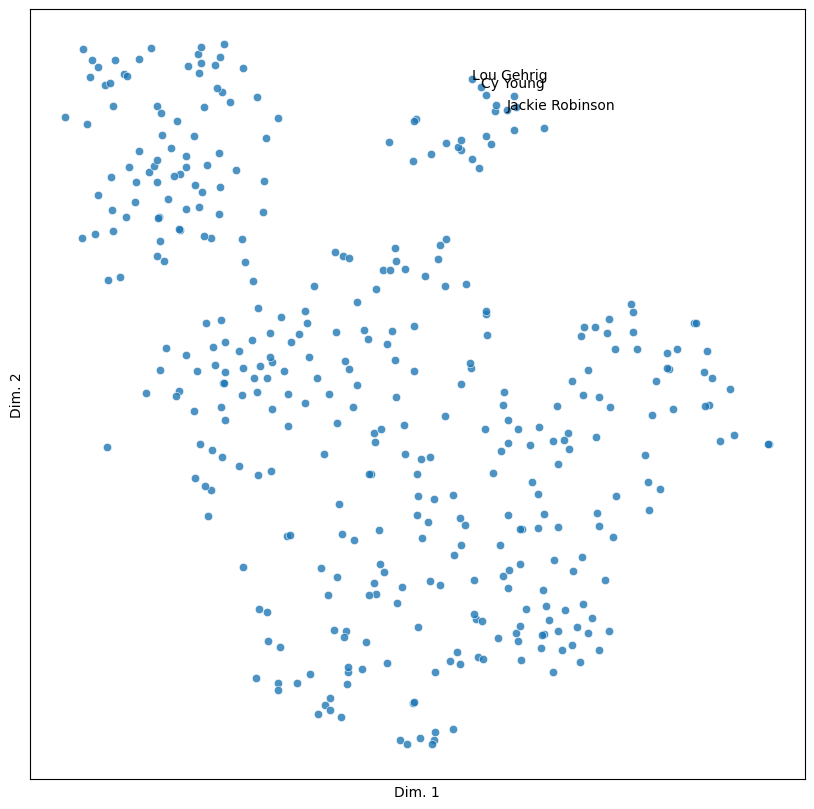

In [55]:
def sim_plot(data, hue = None, labels = None, n_colors = 3):
    """Create a scatterplot and optionally color/label its points."""
    fig, ax = plt.subplots(figsize = (10, 10))
    pal = sns.color_palette('colorblind', n_colors = n_colors) if hue else None
    g = sns.scatterplot(
        x = 'x', y = 'y',
        hue = hue, palette = pal, alpha = 0.8,
        data = data, ax = ax
    )
    g.set(xticks = [], yticks = [], xlabel = 'Dim. 1', ylabel = 'Dim. 2')

    if labels:
        to_label = data[data['label'].isin(labels)]
        to_label[['x', 'y', 'label']].apply(lambda x: g.text(*x), axis = 1)

    plt.show()

people = ('Jackie Robinson', 'Lou Gehrig', 'Cy Young')
sim_plot(vis, labels = people)

In [56]:
agg = AgglomerativeClustering(n_clusters = 18) # hclust
agg.fit(embeddings)

AgglomerativeClustering(n_clusters=18)

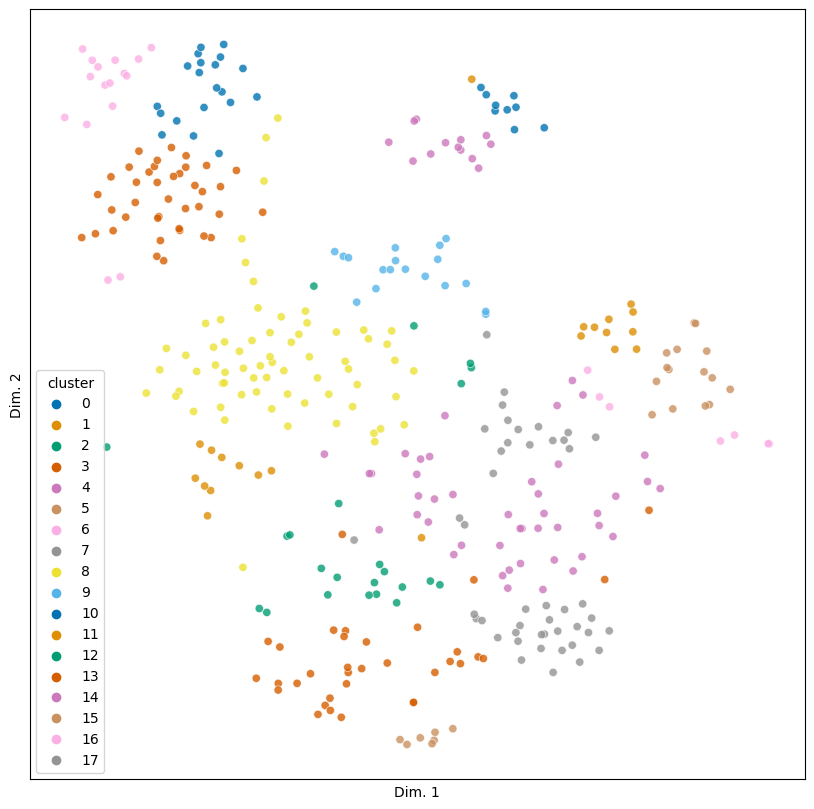

In [57]:
vis.loc[:, 'cluster'] = agg.labels_
sim_plot(vis, hue = 'cluster', n_colors = 18)

In [58]:
for k in (6, 10):
    people = vis.loc[vis['cluster'] == k, 'label']
    print("Cluster:", k, "\n")
    for person in people:
        print(person)
    print("\n")

Cluster: 6 

Maurice Ravel
Constantin Stanislavsky
Bela Bartok
Sergei Eisenstein
Igor Stravinsky
Otto Klemperer
Maria Callas
Arthur Fiedler
Arthur Rubinstein
Andres Segovie
Vladimir Horowitz
Leonard Bernstein
Martha Graham
John Cage
Carlos Montoya
Galina Ulanova


Cluster: 10 

Jerome Kern
W C Handy
Billie Holiday
Cole Porter
Coleman Hawkins
Judy Garland
Louis Armstrong
Mahalia Jackson
Stan Kenton
Richard Rodgers
Thelonious Monk
Earl Hines
Muddy Waters
Ethel Merman
Count Basie
Benny Goodman
Miles Davis
Dizzy Gillespie
Gene Kelly
Frank Sinatra




In [64]:
for person in vis.loc[vis['cluster'] == 3, 'label']:
    print(person)

Qiu Jin
Balfour
Harry S Truman
Adolf Hitler
Lord Keynes
Mohandas K Gandhi
Henry L Stimson
Eva Peron
Joseph Stalin
Getulio Vargas
John Dulles
Hammarskjold
Churchill
David Eisenhower
Ho Chi Minh
Edouard Daladier
De Gaulle Rallied
Khrushchev
Dean Acheson
Roberto Clemente
Haile Selassie
Franco
Chiang Kai shek
Mao Tse Tung
Dash Ended
Leonid Brezhnev
Indira Gandhi
Ferdinand Marcos
Andrei Sakharov
Andrei A Gromyko
Hirohito
Cesar Chavez
Deng Xiaoping
Pierre Trudeau


In [60]:
for person in vis.loc[vis['cluster'] == 12, 'label']:
    print(person)

Robert E Lee
Bedford Forrest
Ulysses Grant
William McKinley
Queen Victoria
Geronimo
John P Holland
Alfred Thayer Mahan
Ernie Pyle
George Patton
Al Capone
John Pershing
Douglas MacArthur
Chester Nimitz
Florence Blanchfield
The Duke of Windsor
